In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
path = pathlib.Path.cwd()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 12})

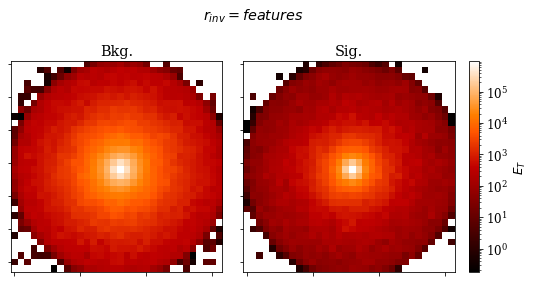

In [8]:
hf = h5py.File(path.parent / "data" / "jet_images_chan_1.h5", "r")
cmap = "gist_heat"

j0 = np.zeros((32,32,1))
b0 = np.zeros((32,32,1))
jet_images = hf["features"]
targets = hf["targets"]
for X, y in zip(jet_images, targets):
    if y == 0:
        b0+= X
    elif y == 1:
        j0 += X
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
bkg = ax[0].imshow(b0, norm=LogNorm(), cmap=cmap)
sig = ax[1].imshow(j0, norm=LogNorm(), cmap=cmap)
fig.colorbar(sig, label="$E_T$")
fig.subplots_adjust(right=0.8)
plt.suptitle("$r_{inv} = %s$" %key.replace("p","."))
ax[0].set_title("Bkg.")
ax[1].set_title("Sig.")
ax[0].set_yticklabels([])
ax[0].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
plt.savefig(path.parent / "figures" / "jet_images" / "png" / f"{key}.png")
plt.savefig(path.parent / "figures" / "jet_images" / "pdf" / f"{key}.pdf")
hf.close()